In [ ]:
#Libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Adafruit_DHT #This library enables the DHT22 Sensor to collect data
#import Adafruit_GPIO.I2C as I2C
import time 
from datetime import datetime
import pytz



In [ ]:
tz = pytz.timezone('Europe/London')

#DHT_SENSOR = Adafruit_DHT.DHT22
sensor = 22
pin = 4
humidity_list = []
celcius_list = []
fahrenheit_list = []
dates = []

In [ ]:
if __name__ =='__main__':
    try:
        while True:
            #tries to read the sensor by using the read_retry menthod
            #which will retry up to 15 times to get a sensor reading
            humidity, celcius_temperature = Adafruit_DHT.read_retry(sensor, pin)
            #converts celcius to fahrenheit
            fahrenheit_temperature = celcius_temperature * 9/5.0 + 32 
            
            #data collected will be saved in to lists
            humidity_list.append(humidity)
            celcius_list.append(celcius_temperature)
            fahrenheit_list.append(fahrenheit_temperature)
            
            #records the time of data collection
            t= datetime.now(tz)
            dates.append(t)
            #while script is running the user can view the data that is being collected
            
            if humidity and celcius_temperature and fahrenheit_temperature is not None:
                print("Temperature = {0:0.1f} celcius {1:5.1f} Fahrenheit      Humidity = {2:0.1f}%"
                     .format(celcius_temperature, fahrenheit_temperature, humidity))
                
            else:
                    print("Failed to get reading from DHT22 Sensor, TRY AGAIN")
                    sys.exit(1)
            time.sleep(60)
                
    except KeyboardInterrupt:
        print("Reading stopped by user")
            

In [4]:
data = {'Celcius' : celcius_list, 'Fahrenheit' : fahrenheit_list, 'Humidity' : humidity_list}
df = pd.DataFrame(data, index=dates)

In [21]:
#saves data in a csv file
file_name = 'DHTSensorData.csv'
csv = df.to_csv(file_name)
cwd = os.getcwd()
print('Temperature and Humidity that have been recorded and saved as {} in {}'.
format(file_name, cwd))

Temperature and Humidity that have been recorded and saved as DHTSensorData.csv in /home/pi/Desktop/jupyter_notebook


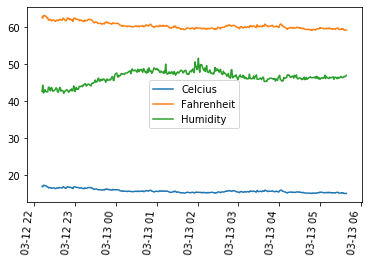

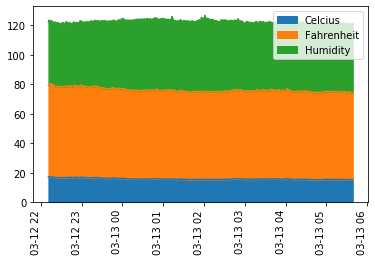

In [6]:
#plot the data using pandas built-in plots
df.plot(rot = 85)
plot = df.plot.area(rot = 90)


Text(0.5, 1.0, 'H Histogram')

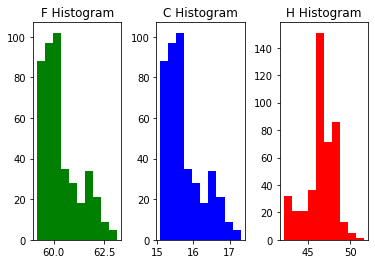

In [7]:
fig = plt.figure()
fig.subplots_adjust(wspace =.4, hspace = .5)

x= df["Fahrenheit"]
y= df["Celcius"]
z= df["Humidity"]

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.hist(x, facecolor= 'g')
ax2.hist(y, facecolor= 'b')
ax3.hist(z, facecolor= 'r')

ax1.set_title('F Histogram')
ax2.set_title('C Histogram')
ax3.set_title('H Histogram')


In [8]:
#Returns the name of the Columns in the DataFrame
df.columns

Index(['Celcius', 'Fahrenheit', 'Humidity'], dtype='object')

In [9]:
#Returns the DateTimeIndex of the recorded data
df.index

DatetimeIndex(['2020-03-12 22:11:06.565168+00:00',
               '2020-03-12 22:12:07.152523+00:00',
               '2020-03-12 22:13:10.217776+00:00',
               '2020-03-12 22:14:15.815081+00:00',
               '2020-03-12 22:15:18.935052+00:00',
               '2020-03-12 22:16:22.055475+00:00',
               '2020-03-12 22:17:25.162672+00:00',
               '2020-03-12 22:18:28.284029+00:00',
               '2020-03-12 22:19:28.855161+00:00',
               '2020-03-12 22:20:31.976456+00:00',
               ...
               '2020-03-13 05:29:28.789041+00:00',
               '2020-03-13 05:30:29.332384+00:00',
               '2020-03-13 05:31:32.448959+00:00',
               '2020-03-13 05:32:32.986362+00:00',
               '2020-03-13 05:33:33.555447+00:00',
               '2020-03-13 05:34:34.142462+00:00',
               '2020-03-13 05:35:34.729620+00:00',
               '2020-03-13 05:36:35.272020+00:00',
               '2020-03-13 05:37:38.387487+00:00',
            

In [10]:
# The number of items the sensor recorded data 
df.count()

Celcius       437
Fahrenheit    437
Humidity      437
dtype: int64

In [11]:
# The maximum temperature & humidity recorded
df.max()

Celcius       17.299999
Fahrenheit    63.139999
Humidity      51.599998
dtype: float64

In [12]:
# The min temperature and humidity recorded
df.min()

Celcius       15.100000
Fahrenheit    59.180001
Humidity      42.099998
dtype: float64

In [13]:
#mean recorded
df.mean()

Celcius       15.758352
Fahrenheit    60.365034
Humidity      46.424256
dtype: float64

In [14]:
#standard dev
df.std()

Celcius       0.494516
Fahrenheit    0.890129
Humidity      1.722306
dtype: float64

In [15]:
#checks the first timestamp
Start_date = df.index[0]
Start_date

Timestamp('2020-03-12 22:11:06.565168+0000', tz='Europe/London')

In [22]:
#checks the last timestamp
End_date = df.index[-1]
End_date

Timestamp('2020-03-13 05:38:41.505379+0000', tz='Europe/London')

In [18]:
timedelta = pd.Timedelta('0 days 1 hour 12 min')
df[Start_date: (Start_date + timedelta)]

,Celcius,Fahrenheit,Humidity
2020-03-12 22:11:06.565168+00:00,17.000000,62.600000,42.599998
2020-03-12 22:12:07.152523+00:00,16.900000,62.419999,44.299999
2020-03-12 22:13:10.217776+00:00,17.299999,63.139999,42.200001
2020-03-12 22:14:15.815081+00:00,17.299999,63.139999,42.500000
2020-03-12 22:15:18.935052+00:00,17.200001,62.960001,43.099998
...,...,...,...
2020-03-12 23:18:04.824924+00:00,16.600000,61.880001,44.500000
2020-03-12 23:19:07.943836+00:00,16.700001,62.060001,44.599998
2020-03-12 23:20:08.497724+00:00,16.700001,62.060001,44.599998
2020-03-12 23:21:11.617334+00:00,16.700001,62.060001,44.299999
